In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv("/content/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df = df.rename(columns=str.lower)

In [ ]:
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content rating', 'genres', 'last updated', 'current ver',
       'android ver'],
      dtype='object')

#Are there duplicate values?

In [ ]:
print('Duplicate rows: ', df.duplicated().sum())
df.drop_duplicates(inplace = True)
print('Duplicate rows after drop: ', df.duplicated().sum())

Duplicate rows:  483
Duplicate rows after drop:  0


As we need work on some features like "Reviews," "Size," "Installs," and "Price". let's convert and clean string-based numerical features like "Reviews," "Size," "Installs," and "Price" into appropriate numerical formats.

# **Reviwes**

**Reviwes cleaning and converting**

In [ ]:
df['reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df['reviews'].isnull().sum()

0

In [ ]:
print(df['reviews'].dtype)

object


Here is some problame col type is object, wheater it should be numeric(float, int) or non-numeric(str)

Let's Check, how much row is numeric or non-numeric?

In [ ]:
print('Number of non numeric reviews :', len(df) - df.reviews.str.isnumeric().sum())

Number of non numeric reviews : 1


let's anlyze the non numeric row of the reviwes

In [ ]:
df[pd.to_numeric(df.reviews, errors='coerce').isna()]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.head(1)

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
df.shape

(10358, 13)

**The data at row 9300 is incorrect. The values in all of the columns are wrong. The correct data for row 9300 is look like as follows:**


The following changes need to be made to the incorrect data:

* The app name should be "Photo Editor & Candy Camera & Grid & ScrapBook".
* The category should be "ART_AND_DESIGN".
* The rating should be "4.1".
* The number of reviews should be "159".
* The size should be "19M".
* The number of installs should be "10,000+".
* The type should be "Free".
* The price should be "0".
* The content rating should be "Everyone".
* The genres should be "Art & Design".
* The last updated date should be "January 7, 2018".
* The current version should be "1.0.0".
* The minimum Android version should be "4.0.3 and up".

It should be look like above list but the data is looking much diffrent then other row so we need to remove this row.

In [ ]:
df= df.drop(10472)
df = df.reset_index(drop=True)

In [ ]:
df.shape

(10357, 13)

After removing the the non-numeric value.

In [ ]:
print('Number of non numeric reviews :', len(df) - df.reviews.str.isnumeric().sum())

Number of non numeric reviews : 0


Now lets convert reviwes column into **int64** data type

In [ ]:
df['reviews'] = df['reviews'].astype('Int64')


In [ ]:
print(df['reviews'].dtype)

Int64


# **Size**

**Size cleaning and converting**

In [ ]:
df['size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10352                   53M
10353                  3.6M
10354                  9.5M
10355    Varies with device
10356                   19M
Name: size, Length: 10357, dtype: object

We observe that various applications display the letter 'M' as an abbreviation for megabytes (MB). Additionally, there is a size indicator labeled as 'Varies with device.' Our objective is to employ regular expressions to explore if there are any alternative non-numeric size representations.

In [ ]:
df[~df['size'].str.contains('\d+M', regex=True, na=False)].head(5)

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device


Let's investigate if there are any other characters or strings used to represent sizes besides 'k', 'M', and 'Varies with device'.

Upon examining the available data, we observe that certain entries display 'Varies with device' as their size indication. Additionally, a few apps specify their size in kilobytes (KB), denoted by the letter 'k'.

Now, we will explore whether there are any alternative characters or strings used to represent app sizes.

In [ ]:
df[df['size'].str.contains('[^kMVaries with device]$', regex=True, na=False)].head()


,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver


Okay, the sizes can be expressed in **KB (k)**, **MB** **(M)**, or they may vary depending on the device.


We will assign the label 'NaN' to the size values that correspond to **"Varies with device."**

In [ ]:
df['size'] = df['size'].replace("Varies with device",np.nan)

In [ ]:
df['size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10352     53M
10353    3.6M
10354    9.5M
10355     NaN
10356     19M
Name: size, Length: 10357, dtype: object

Next, let's proceed with the conversion of the sizes to kilobytes (KB) and megabytes (MB).

In [ ]:
size = []
for i in df['size']:
    if pd.isna(i):
        size.append('NaN')
    elif isinstance(i, str) and i[-1] == 'k':
        size.append(float(i[:-1]) / 1000)
    elif isinstance(i, str) and i[-1] == 'M':
        size.append(float(i[:-1]) * 1000)
    else:
        size.append(float(i))


In [ ]:
df['size'] = size
df['size'] = df['size'].astype(float)


In [ ]:
df['size'].dtype

dtype('float64')

# **Install**

**Install cleaning and converting**

In [ ]:
df['installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10352         5,000+
10353           100+
10354         1,000+
10355         1,000+
10356    10,000,000+
Name: installs, Length: 10357, dtype: object

In [ ]:
df['installs'].isnull().sum()

0

We will remove the **'+'** symbol from the rows and add it to the feature name.

In [ ]:
df['installs'] = df['installs'].str.replace(",", "",regex=True).str.replace("+", "",regex=True)

In [ ]:
df.head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Now lets convert install column into **float** data type

In [ ]:
df['installs']=pd.to_numeric(df['installs'])
df['installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

# **Price**

**Install cleaning and converting**

In [ ]:
df['price'].head()

0    0
1    0
2    0
3    0
4    0
Name: price, dtype: object

In [ ]:
df['price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['price'].isnull().sum()

0

There are no missing values in the price column

"Remove the ***'$' ***symbol from the price and convert type into float:

In [ ]:
df['price'] = df['price'].astype(str).str.replace('$', '', regex=True).astype(float)


In [ ]:
# df['price'] = pd.to_numeric(df['price'])

In [ ]:
df['price'].dtype

dtype('float64')

In [ ]:
df['price'].value_counts()

0.00      9592
0.99       146
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: price, Length: 92, dtype: int64

In [ ]:
df.isnull().sum()

app                  0
category             0
rating            1465
reviews              0
size              1526
installs             0
type                 1
price                0
content rating       0
genres               0
last updated         0
current ver          8
android ver          2
dtype: int64

**There are some rows with missing values for rating and size. We can impute these quantites by KNNImputer later.**

In [ ]:
# df.dropna(inplace=True)
# df.isnull().sum()

In [ ]:
df['current ver']

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10352                  1.48
10353                   1.0
10354                   1.0
10355    Varies with device
10356    Varies with device
Name: current ver, Length: 10357, dtype: object

In [ ]:
df['current ver'] = df['current ver'].replace('Varies with device', 'NaN', regex=True)

In [ ]:
df['current ver'].value_counts()

NaN           1302
1.0            802
1.1            260
1.2            177
2.0            149
              ... 
3.18.5           1
1.3.A.2.9        1
9.9.1.1910       1
7.1.34.28        1
2.0.148.0        1
Name: current ver, Length: 2831, dtype: int64

In [ ]:
df['current ver']=df['current ver'].str.extract(r'^(\d+).', ).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10357 non-null  object 
 1   category        10357 non-null  object 
 2   rating          8892 non-null   float64
 3   reviews         10357 non-null  Int64  
 4   size            8831 non-null   float64
 5   installs        10357 non-null  int64  
 6   type            10356 non-null  object 
 7   price           10357 non-null  float64
 8   content rating  10357 non-null  object 
 9   genres          10357 non-null  object 
 10  last updated    10357 non-null  object 
 11  current ver     8841 non-null   float64
 12  android ver     10355 non-null  object 
dtypes: Int64(1), float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [ ]:
df['android ver']=df['android ver'].replace('and up', '', regex=True)

In [ ]:
df['android ver'].value_counts()

4.1                   2379
4.0.3                 1451
4.0                   1337
Varies with device    1221
4.4                    894
2.3                    643
5.0                    546
4.2                    387
2.3.3                  279
2.2                    239
3.0                    237
4.3                    235
2.1                    133
1.6                    116
6.0                     58
7.0                     42
3.2                     36
2.0                     32
5.1                     22
1.5                     20
4.4W                    11
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: android ver, dtype: int64

In [ ]:
df['android ver'] = df['android ver'].replace('Varies with device', np.nan, regex=True)
df['android ver'] = df['android ver'].replace('W', np.nan, regex=True)
df=df.loc[df['android ver'].str.contains(r'-') == False]

In [ ]:
df['android ver']=df['android ver'].str.strip()

<ipython-input-91-47d29722475a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['android ver'].value_counts()

4.0    2788
4.1    2379
2.3     922
4.4     894
5.0     546
4.2     387
2.2     239
3.0     237
4.3     235
2.1     133
1.6     116
6.0      58
7.0      42
2.0      39
3.2      36
5.1      22
1.5      20
3.1      10
8.0       6
7.1       3
1.0       2
Name: android ver, dtype: int64

In [ ]:
df['android ver'] = df['android ver'].apply(lambda x: x[:3]).astype(float)

TypeError: ignored

In [ ]:
df['last updated Year']=pd.to_datetime(df['last updated'])

<ipython-input-110-93b901a836f6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['last updated Year']=df['last updated Year'].dt.year

<ipython-input-111-d6f1b4ea0f49>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **Exploratory Data Analysis**

In [ ]:
def num_plots(df, column, title, xaxis_title):
    fig = px.histogram(df, x=column, nbins=60, title=title)
    fig.update_layout(xaxis_title=xaxis_title, bargap=0.2)
    fig.show()

In [ ]:
df['rating'].describe()

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [ ]:
num_plots(df, 'rating', 'App rating distribution', 'Rating')

In [ ]:
counts = df['type'].value_counts().reset_index()

counts.columns = ['type', 'count']


fig = px.bar(counts, x='type', y='count', title='Paid vs Free apps', color='type')
fig.update_layout(xaxis_title='App type')
fig.show()

In [ ]:
counts = df['content rating'].value_counts().reset_index()

counts.columns = ['content rating', 'count']

fig = px.bar(counts, x='content rating', y='count', title='Paid vs Free apps', color='content rating')
fig.update_layout(xaxis_tickangle=-60)
fig.show()

In [ ]:
fig = px.box(df, x='content rating', y='rating', title='Content rating vs rating', color='content rating')
fig.show()

In [ ]:
fig = px.box(df, x='content rating', y='installs', color='type', title='Installs per content rating by type')
fig.update_traces(boxmean=True)
fig.update_layout(yaxis_type='log')
fig.show()

In [ ]:
df['genres'].value_counts()

Tools                                842
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: genres, Length: 119, dtype: int64

<ipython-input-73-0eb9a5e248d0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



               rating   reviews      size  installs     price  current ver
rating       1.000000  0.068732  0.082079  0.050886 -0.022355    -0.006560
reviews      0.068732  1.000000  0.237837  0.634997 -0.009417    -0.002292
size         0.082079  0.237837  1.000000  0.168864 -0.023840    -0.005654
installs     0.050886  0.634997  0.168864  1.000000 -0.011147    -0.002287
price       -0.022355 -0.009417 -0.023840 -0.011147  1.000000    -0.000912
current ver -0.006560 -0.002292 -0.005654 -0.002287 -0.000912     1.000000


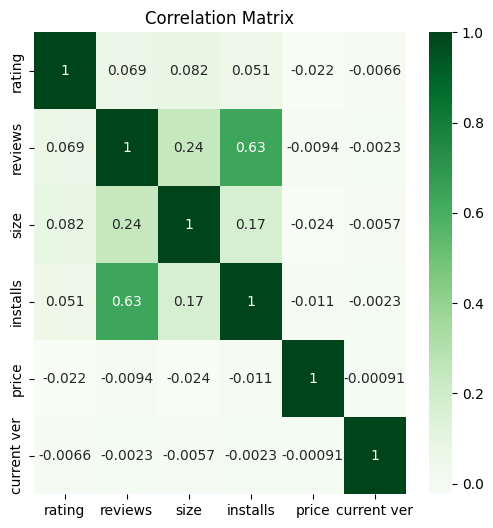

In [ ]:
corr_matrix = df.corr()

print(corr_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
fig = px.scatter(df, x='price', y='rating', trendline='ols', title='Price VS Rating')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
fig = px.box(df, x='category', y='rating', color='type', title='Rating vs Category')
fig.update_layout(xaxis_tickangle=-90)
fig.show()


In [ ]:
df['size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10352    53000.0
10353     3600.0
10354     9500.0
10355        NaN
10356    19000.0
Name: size, Length: 10357, dtype: float64

In [ ]:
fig = px.scatter(df, x='rating', y='size', trendline='ols', title='Rating vs Size')
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9114 entries, 0 to 10354
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        9114 non-null   object 
 1   rating          7700 non-null   float64
 2   reviews         9114 non-null   Int64  
 3   size            8756 non-null   float64
 4   installs        9114 non-null   int64  
 5   type            9114 non-null   object 
 6   price           9114 non-null   float64
 7   content rating  9114 non-null   object 
 8   genres          9114 non-null   object 
 9   current ver     8750 non-null   float64
 10  android ver     9114 non-null   object 
dtypes: Int64(1), float64(4), int64(1), object(5)
memory usage: 863.3+ KB


In [ ]:
df1=df.copy()

In [ ]:
df=df.drop(['app','last updated'], axis=1)

In [ ]:
df['last updated']=df1['last updated']

<ipython-input-106-7120ae341a0c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,category,rating,reviews,size,installs,type,price,content rating,genres,current ver,android ver,last updated Year
0,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0,4.0,2018
1,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0,4.0,2018
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.0,4.0,2018
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,NaN,4.2,2018
4,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.0,4.4,2018


In [ ]:
df=df.drop(['last updated'], axis=1)

In [ ]:
df.describe()

,rating,reviews,size,installs,price,current ver,android ver,last updated Year
count,7700.000000,9114.0,8756.000000,9.114000e+03,9114.000000,8.750000e+03,9114.000000,9114.000000
mean,4.174857,255284.778253,21293.791839,7.290547e+06,1.139661,2.058323e+04,3.852030,2017.330810
std,0.544594,1625327.621091,22584.250971,4.360539e+07,17.345162,1.361118e+06,0.842322,1.147596
min,1.000000,0.0,0.008500,0.000000e+00,0.000000,0.000000e+00,1.000000,2010.000000
25%,4.000000,22.0,4700.000000,1.000000e+03,0.000000,1.000000e+00,4.000000,2017.000000
50%,4.300000,783.0,13000.000000,1.000000e+05,0.000000,1.000000e+00,4.100000,2018.000000
75%,4.500000,26543.75,29000.000000,1.000000e+06,0.000000,3.000000e+00,4.100000,2018.000000
max,5.000000,44893888.0,100000.000000,1.000000e+09,400.000000,1.255162e+08,8.000000,2018.000000


**Categorical features Encoding**

To replace the values 'Free' and 'Paid' with 0 and 1, respectively, in the 'price' column

In [ ]:
df['type'] = df['type'].replace({'Free':0, "Paid":1})

In [ ]:
#df_after_all=df.copy()

In [ ]:
data=df_after_all.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9114 entries, 0 to 10354
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           9114 non-null   object 
 1   rating             7700 non-null   float64
 2   reviews            9114 non-null   Int64  
 3   size               8756 non-null   float64
 4   installs           9114 non-null   int64  
 5   type               9114 non-null   int64  
 6   price              9114 non-null   float64
 7   content rating     9114 non-null   object 
 8   genres             9114 non-null   object 
 9   current ver        8750 non-null   float64
 10  android ver        9114 non-null   float64
 11  last updated Year  9114 non-null   int64  
dtypes: Int64(1), float64(5), int64(3), object(3)
memory usage: 934.5+ KB


Regarding the encoding of the 'Content Rating' and 'Genres' columns, we will utilize a label encoder instead of one-hot encoding (OHE) to avoid generating an excessive number of columns.

In [ ]:
en = LabelEncoder()
allCcols = ['category', 'content rating', 'genres']

for col in allCcols:
    data[col] = en.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9114 entries, 0 to 10354
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           9114 non-null   int64  
 1   rating             7700 non-null   float64
 2   reviews            9114 non-null   Int64  
 3   size               8756 non-null   float64
 4   installs           9114 non-null   int64  
 5   type               9114 non-null   int64  
 6   price              9114 non-null   float64
 7   content rating     9114 non-null   int64  
 8   genres             9114 non-null   int64  
 9   current ver        8750 non-null   float64
 10  android ver        9114 non-null   float64
 11  last updated Year  9114 non-null   int64  
dtypes: Int64(1), float64(5), int64(6)
memory usage: 934.5 KB


**To address the missing values in the 'rating' and 'size' columns, we can utilize the KNNImputer for imputation.**

In [ ]:
imputer = KNNImputer(n_neighbors=3)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [ ]:
data.isnull().sum()

category             0
rating               0
reviews              0
size                 0
installs             0
type                 0
price                0
content rating       0
genres               0
current ver          0
android ver          0
last updated Year    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9114 entries, 0 to 9113
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           9114 non-null   float64
 1   rating             9114 non-null   float64
 2   reviews            9114 non-null   float64
 3   size               9114 non-null   float64
 4   installs           9114 non-null   float64
 5   type               9114 non-null   float64
 6   price              9114 non-null   float64
 7   content rating     9114 non-null   float64
 8   genres             9114 non-null   float64
 9   current ver        9114 non-null   float64
 10  android ver        9114 non-null   float64
 11  last updated Year  9114 non-null   float64
dtypes: float64(12)
memory usage: 854.6 KB


In [ ]:
X=data.drop('rating', axis = 1).values

In [ ]:
y=data['rating'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE using RF: ", np.sqrt(mse_rf))

RMSE using RF:  0.48942516893710125


# **XGBot**

In [ ]:
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.01)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_pred_xgb, y_test)

In [ ]:
print(r"RMSE with RF: {:.3f}".format(np.sqrt(mse_rf)))
print(r"RMSE with XGBoost: {:.3f}".format(np.sqrt(mse_xgb)))

RMSE with RF: 0.489
RMSE with XGBoost: 0.488


In your case, you mentioned two models: Random Forest (RF) and XGBoost. Both models have achieved similar RMSE values: RF with an RMSE of 0.489 and XGBoost with an RMSE of 0.488.

The RMSE represents the average difference between the predicted values and the actual values. A value of 0 would indicate a perfect match between predictions and actual values.

Having RMSE values close to each other suggests that both models perform similarly in terms of predictive accuracy. They provide similar levels of accuracy in predicting the target variable.

# **Thank YOU**

